<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/RandomML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5-fold and 10-fold Cross Validation
Divides into 5-10 equal subsets.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_samples = 1000, n_features= 20, random_state =42)

# 5 Fold CV
rf = RandomForestClassifier(n_estimators =100, random_state =42)
cv_5fold = KFold(n_splits = 5, shuffle = True, random_state =42)
scores_5fold = cross_val_score(rf, X,y, cv = cv_5fold, scoring = 'accuracy')

max_5fold = np.max(scores_5fold)

print(scores_5fold)
print(max_5fold)


#10 fold CV
rf = RandomForestClassifier(n_estimators =100, random_state =42)
cv_10fold = KFold(n_splits = 10, shuffle = True, random_state =42)
scores_10fold = cross_val_score(rf, X,y, cv = cv_10fold, scoring = 'accuracy')

print(scores_10fold)

[0.895 0.86  0.935 0.88  0.925]
0.935
[0.88 0.91 0.81 0.93 0.92 0.94 0.88 0.86 0.94 0.89]


AUC- ROC evaluation metrics
- Area Under the Receiver Operating Characteristic Curve

AUC-ROC Score: 0.97


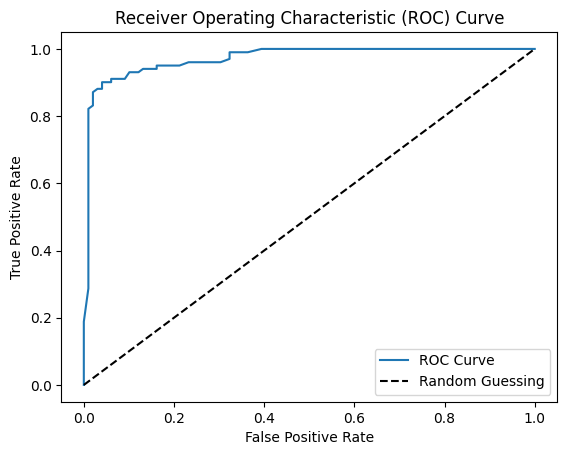

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X,y = make_classification(n_samples = 1000, n_features = 20, random_state =42)

rf = RandomForestClassifier(n_estimators = 100, random_state =42)

cv = KFold(n_splits =5, shuffle = True, random_state = 42)

true_labels = []
predicted_probabilities = []

for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  rf.fit(X_train, y_train)

  y_pred = rf.predict_proba(X_test)[:,1]

true_labels.extend(y_test)
predicted_probabilities.extend(y_pred)

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(true_labels, predicted_probabilities)
print("AUC-ROC Score: {:.2f}".format(auc_roc_score))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples =100, n_features = 5)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
rf = RandomForestClassifier().fit(X_train, y_train)

cv = KFold(n_splits =5)

score = cross_val_score(rf,X,y, cv=cv, scoring = 'accuracy')
print(score)



[0.95 0.95 0.85 0.9  0.9 ]


- L1 - Lasso Regularization (adds the absolute values of the coefficents to the loss function)
- L2 - Ridge Regularization (adds the squared values)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X,y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print("Lasso MSE:", lasso_mse)
print("Lasso Coefficients:", lasso_model.coef_)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print("Ridge MSE:", ridge_mse)
print("Ridge Coefficients:", ridge_model.coef_)

Lasso MSE: 2944.607174030748
Lasso Coefficients: [  1.73045056 -11.31635911  25.82462699  16.64425156 -29.35841191
  13.27584411   0.5479479   10.23616805  29.63282611   2.39347521]
Ridge MSE: 2970.602383512496
Ridge Coefficients: [  1.76053729 -11.50488363  25.62469304  16.81778273 -43.20966186
  23.67767588   7.13085007  12.96531191  34.68257943   2.36395728]


Voting Classifier
- Combine multiple invidiual models to make a final prediction.
- Hard and Soft voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples = 1000, n_features =20)


model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC(probability =True)

voting_classifier = VotingClassifier(
    estimators = [('dt', model1), ('lr', model2), ('svm', model3)], voting='soft'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
voting_classifier.fit(X_train, y_train)

predictions = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [ ]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.965


In [ ]:
voting_classifier = VotingClassifier(
    estimators = [('dt', model1), ('lr', model2), ('svm', model3)], voting='hard'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
voting_classifier.fit(X_train, y_train)

predictions_hard = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions_hard)
print("Accuracy:", accuracy)

Accuracy: 0.895


Architechture of CNN (Convolutional Neural Networks):
- Convolutional Layers
- Activation Functions (Thanh, Sigmoid, ReLU)
- Pooling layers
- Fully connected layers
- Flattening

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

#Convolutional and pooling layers
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for MNIST dataset

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)         

Time Series Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
np.random.seed(42)
n_points = 200
time = np.arange(n_points)
signal = np.sin(0.2*time)+0.5*np.random.randn(n_points)

data = pd.DataFrame({'timestamp': pd.date_range(start='2022-01-01', periods = n_points, freq ='D'), 'value': signal})
data.head()

,timestamp,value
0,2022-01-01,0.248357
1,2022-01-02,0.129537
2,2022-01-03,0.713263
3,2022-01-04,1.326157
4,2022-01-05,0.600279


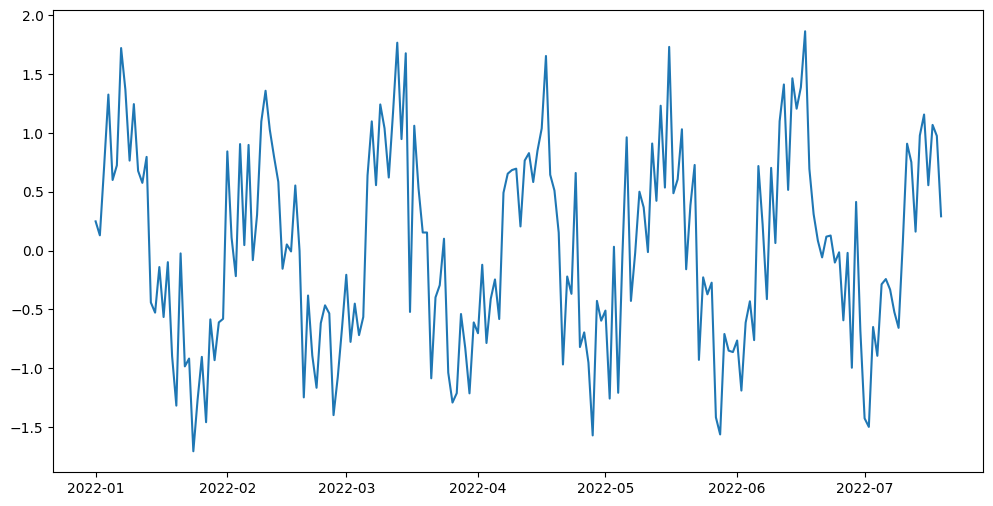

In [4]:
plt.figure(figsize =(12,6))
plt.plot(data['timestamp'], data['value'])
plt.show()

Energy Consumption Prediction in *Buildings*
- In this model we used random data for the features, but in real applications we can take the data from a public government websites.
- In this case we have to do data preprocessing, feature engineering, data enrichment and etc.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
np.random.seed(42)
num_samples = 200

temperature = np.random.normal(22,2, num_samples)
occupancy = np.random.randint(0,2, num_samples)
natural_light = np.random.normal(500,100, num_samples)
energy_consumption = 100*occupancy + 10*temperature + 5*natural_light + np.random.normal(0,10, num_samples)

df = pd.DataFrame({
    'Temperature': temperature,
    'Occupancy': occupancy,
    'Natural_light': natural_light,
    'Energy_consumption': energy_consumption
})

df.head()

,Temperature,Occupancy,Natural_light,Energy_consumption
0,22.993428,1,484.821490,2747.576007
1,21.723471,1,558.831721,3100.577837
2,23.295377,0,528.099187,2890.321121
3,25.046060,1,437.730048,2547.927235
4,21.531693,0,479.187775,2611.176081


In [19]:
df.isnull().sum()

Temperature           0
Occupancy             0
Natural_light         0
Energy_consumption    0
dtype: int64

In [28]:
X = df.drop(['Energy_consumption'], axis =1)
y = df['Energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

model = RandomForestRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

feature_importance = model.feature_importances_
print(f'Feature importance: {feature_importance}')

Mean Squared Error: 1974.4901304960179
Feature importance: [0.00590955 0.00342994 0.99066051]


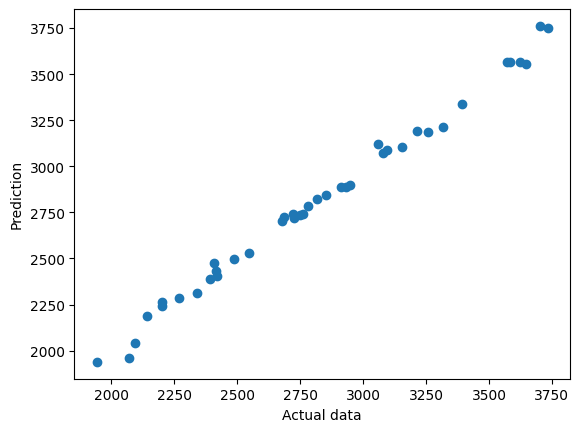

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual data')
plt.ylabel('Prediction')
plt.show()

Grid Search
- Easy to implement
- Useful when the hyperparametr space is small

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [10,50,100,200],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2,5,10],
}

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error on Test Set: 2004.5600603236992
